In [2]:
import pandas as pd
import numpy as np
import csv
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df_train = pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')

In [4]:
df_train.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature MiscVal MoSold  \
0         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
1         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      5   
2         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      9   
3         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
4         Lvl    AllPub  ...        0    NaN   NaN         NaN       0     12   

  YrSold  SaleType  SaleCondition  SalePrice  
0   2008        WD         Normal     208500  
1   2007        WD         Normal     181500  
2   2008        WD         Normal     223500  
3   2006        WD        Abnorml     140000  
4   2008        WD         Normal     250000  

[5 rows x 81 columns]

In [5]:
print(df_train.shape)
print(df_test.shape)

(1460, 81)
(1459, 80)


In [6]:
df_train.keys()

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [7]:
for col in df_train.keys():
    print(df_train.isna()[col].value_counts())
# FireplaceQu
# Fence

False    1460
Name: Id, dtype: int64
False    1460
Name: MSSubClass, dtype: int64
False    1460
Name: MSZoning, dtype: int64
False    1201
True      259
Name: LotFrontage, dtype: int64
False    1460
Name: LotArea, dtype: int64
False    1460
Name: Street, dtype: int64
True     1369
False      91
Name: Alley, dtype: int64
False    1460
Name: LotShape, dtype: int64
False    1460
Name: LandContour, dtype: int64
False    1460
Name: Utilities, dtype: int64
False    1460
Name: LotConfig, dtype: int64
False    1460
Name: LandSlope, dtype: int64
False    1460
Name: Neighborhood, dtype: int64
False    1460
Name: Condition1, dtype: int64
False    1460
Name: Condition2, dtype: int64
False    1460
Name: BldgType, dtype: int64
False    1460
Name: HouseStyle, dtype: int64
False    1460
Name: OverallQual, dtype: int64
False    1460
Name: OverallCond, dtype: int64
False    1460
Name: YearBuilt, dtype: int64
False    1460
Name: YearRemodAdd, dtype: int64
False    1460
Name: RoofStyle, dtype: int64
False

In [8]:
col = 'Neighborhood'
print(f'{col :-<50}{len(df_train[col].unique())}')
print(f'{col :-<50}{df_train[col].unique()}')

Neighborhood--------------------------------------25
Neighborhood--------------------------------------['CollgCr' 'Veenker' 'Crawfor' 'NoRidge' 'Mitchel' 'Somerst' 'NWAmes'
 'OldTown' 'BrkSide' 'Sawyer' 'NridgHt' 'NAmes' 'SawyerW' 'IDOTRR'
 'MeadowV' 'Edwards' 'Timber' 'Gilbert' 'StoneBr' 'ClearCr' 'NPkVill'
 'Blmngtn' 'BrDale' 'SWISU' 'Blueste']


In [9]:
continuous_variables = list()
discrete_variables = list ()

for col in df_train:
    if len(df_train[col].unique()) > 30 and col != 'Id':
        continuous_variables.append(col)
    else:
        discrete_variables.append(col)

print(continuous_variables)
print('---------------------')
print(discrete_variables)

['LotFrontage', 'LotArea', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'GrLivArea', 'GarageYrBlt', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', 'ScreenPorch', 'SalePrice']
---------------------
['Id', 'MSSubClass', 'MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'LowQualFinSF', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageCars', 'GarageQual', 'GarageCond', 'PavedDrive

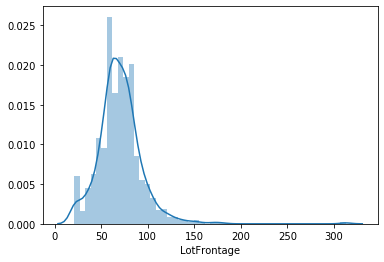

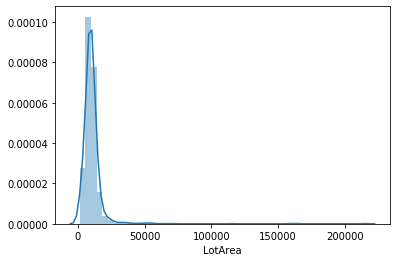

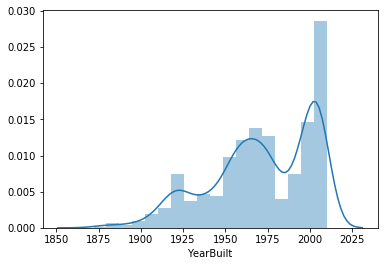

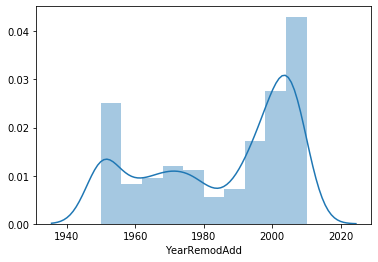

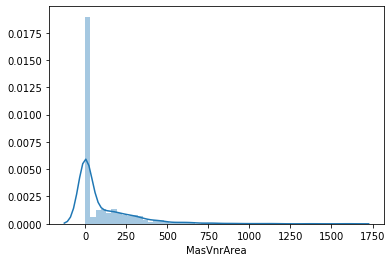

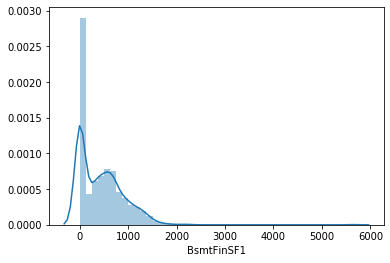

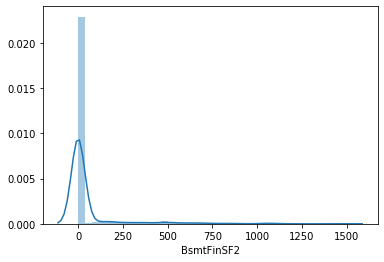

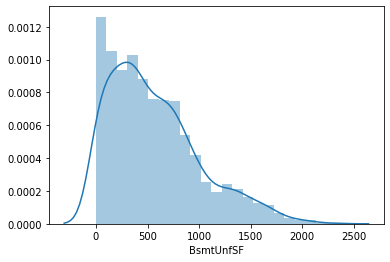

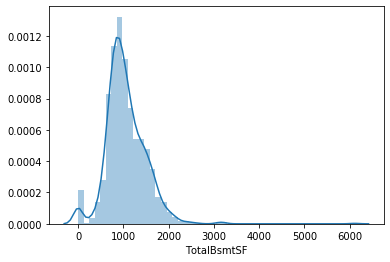

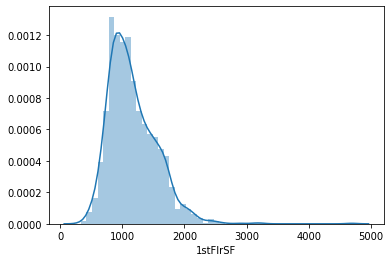

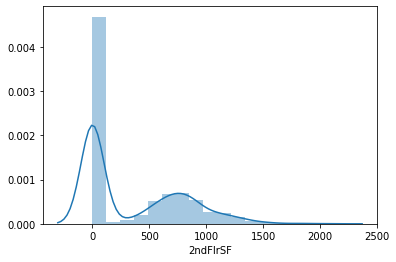

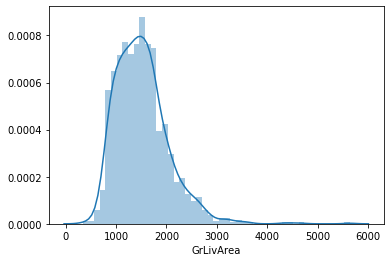

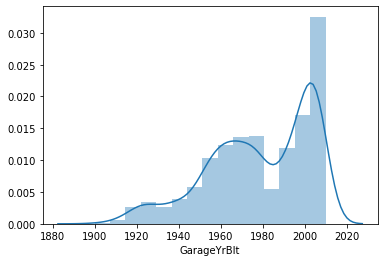

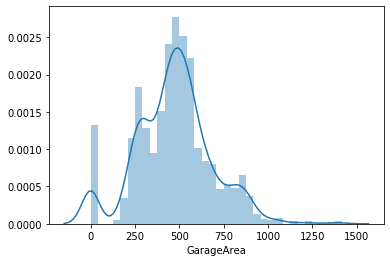

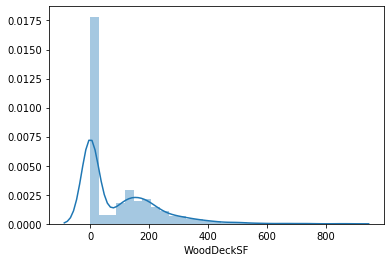

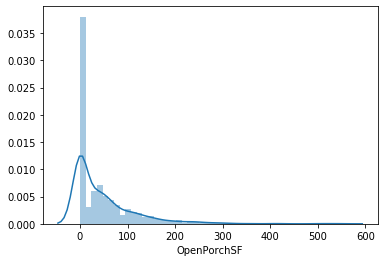

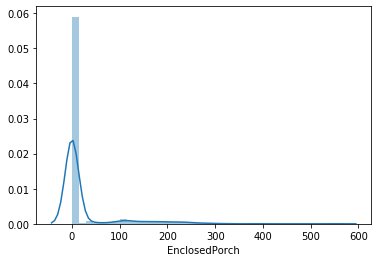

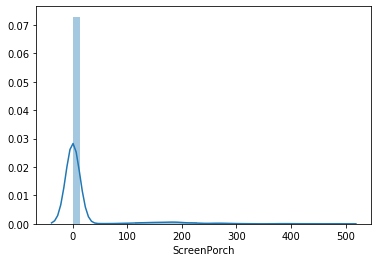

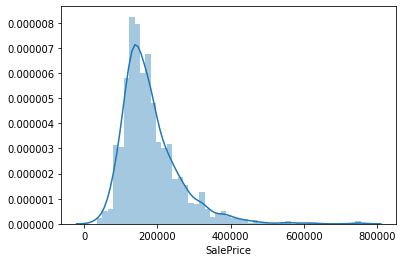

In [10]:
for col in continuous_variables:
    plt.figure()
    sns.distplot(df_train[col])

In [11]:
for col in discrete_variables:
    print(f'{col :-<20}{df_train[col].unique()}')

Id------------------[   1    2    3 ... 1458 1459 1460]
MSSubClass----------[ 60  20  70  50 190  45  90 120  30  85  80 160  75 180  40]
MSZoning------------['RL' 'RM' 'C (all)' 'FV' 'RH']
Street--------------['Pave' 'Grvl']
Alley---------------[nan 'Grvl' 'Pave']
LotShape------------['Reg' 'IR1' 'IR2' 'IR3']
LandContour---------['Lvl' 'Bnk' 'Low' 'HLS']
Utilities-----------['AllPub' 'NoSeWa']
LotConfig-----------['Inside' 'FR2' 'Corner' 'CulDSac' 'FR3']
LandSlope-----------['Gtl' 'Mod' 'Sev']
Neighborhood--------['CollgCr' 'Veenker' 'Crawfor' 'NoRidge' 'Mitchel' 'Somerst' 'NWAmes'
 'OldTown' 'BrkSide' 'Sawyer' 'NridgHt' 'NAmes' 'SawyerW' 'IDOTRR'
 'MeadowV' 'Edwards' 'Timber' 'Gilbert' 'StoneBr' 'ClearCr' 'NPkVill'
 'Blmngtn' 'BrDale' 'SWISU' 'Blueste']
Condition1----------['Norm' 'Feedr' 'PosN' 'Artery' 'RRAe' 'RRNn' 'RRAn' 'PosA' 'RRNe']
Condition2----------['Norm' 'Artery' 'RRNn' 'Feedr' 'PosN' 'PosA' 'RRAn' 'RRAe']
BldgType------------['1Fam' '2fmCon' 'Duplex' 'TwnhsE' 'Twnhs']
H

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matp

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matp

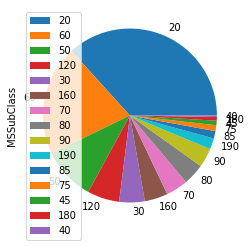

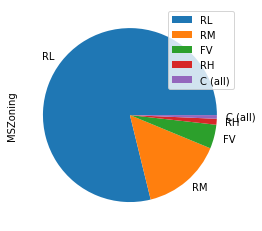

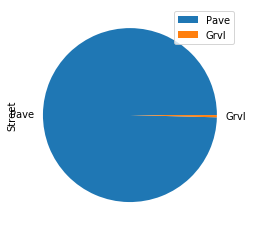

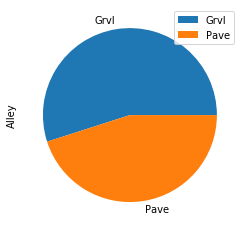

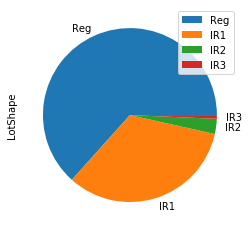

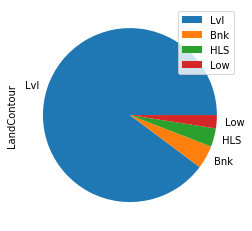

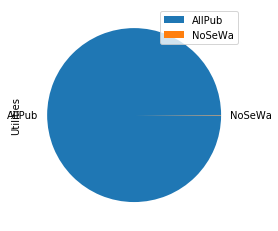

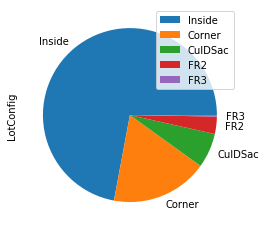

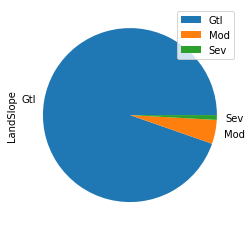

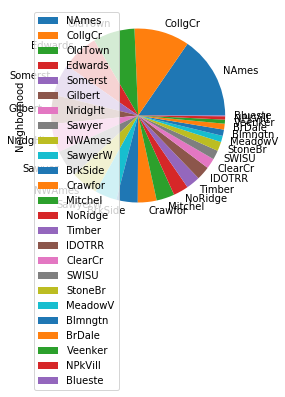

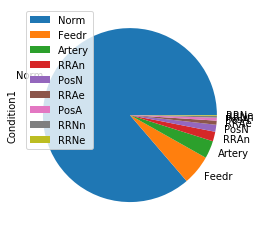

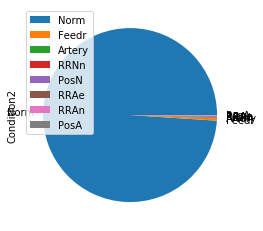

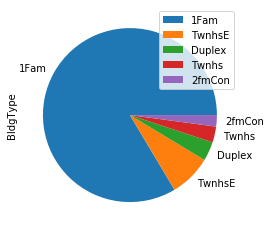

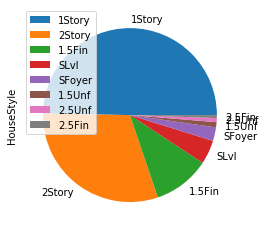

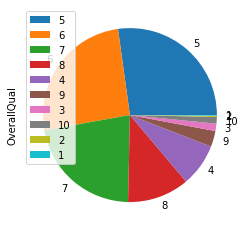

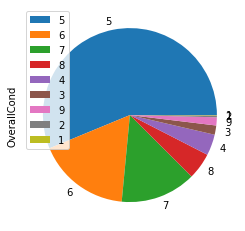

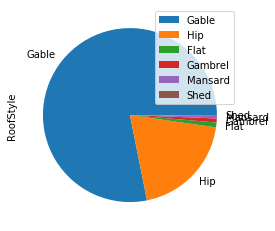

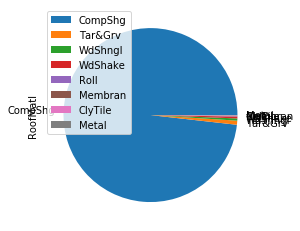

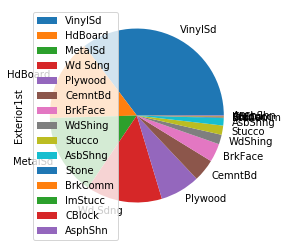

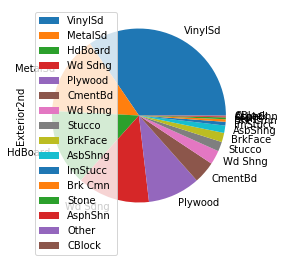

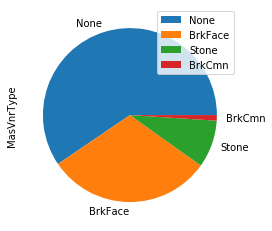

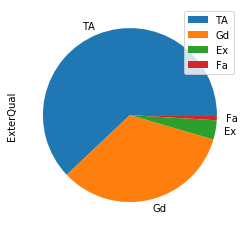

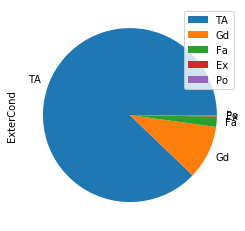

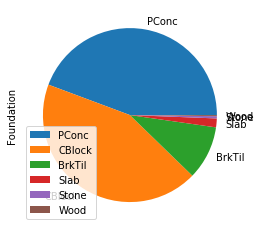

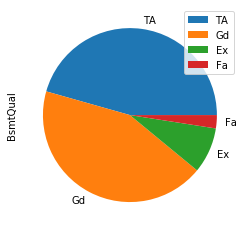

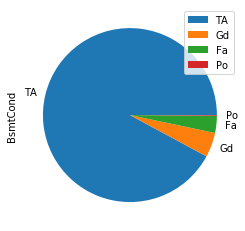

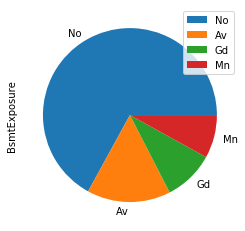

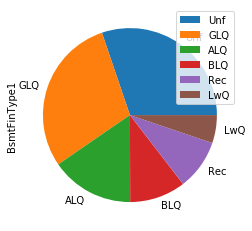

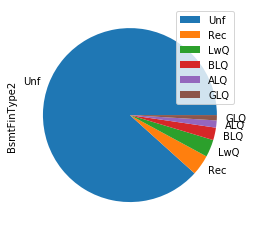

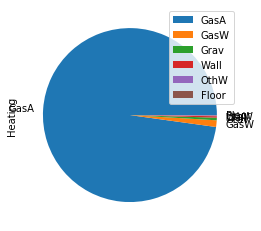

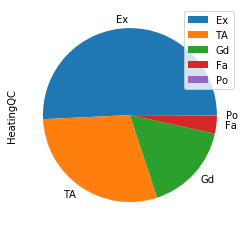

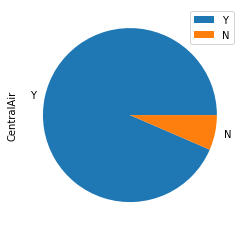

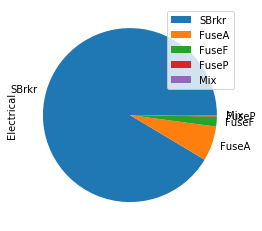

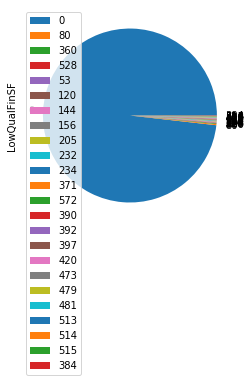

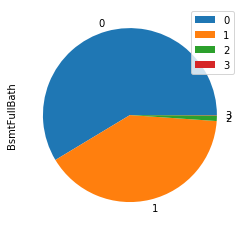

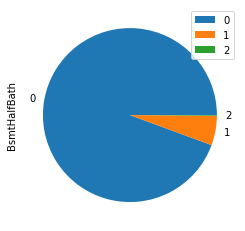

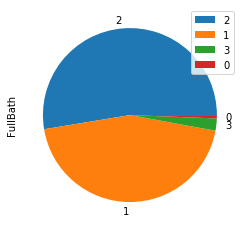

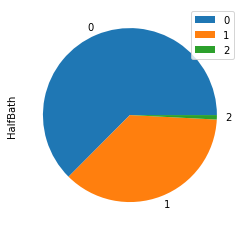

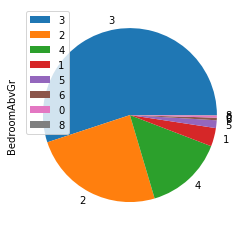

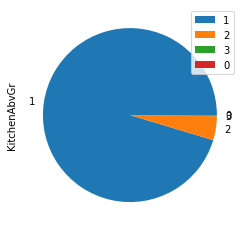

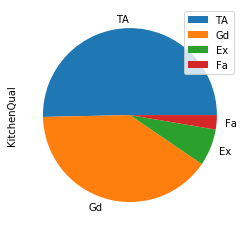

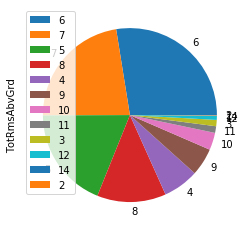

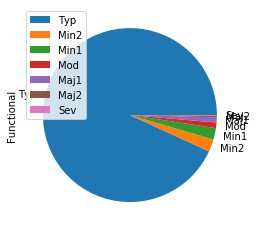

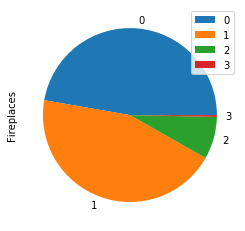

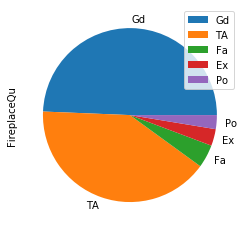

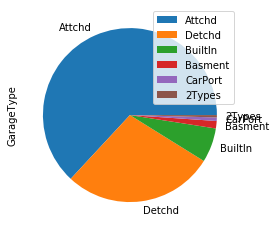

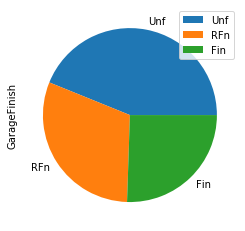

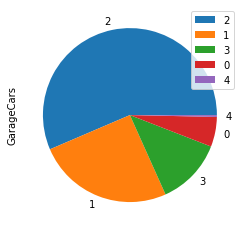

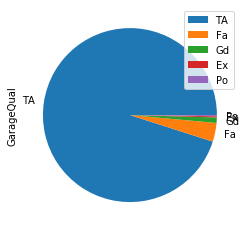

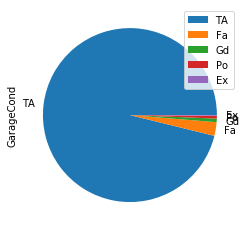

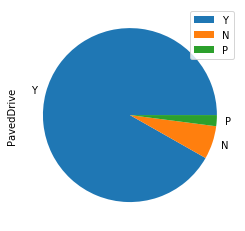

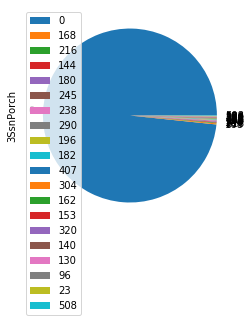

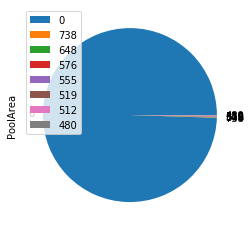

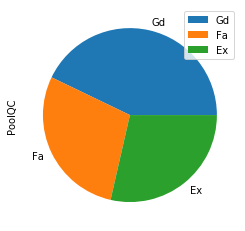

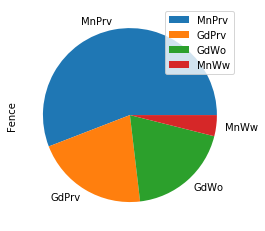

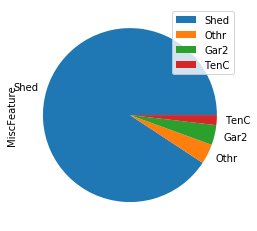

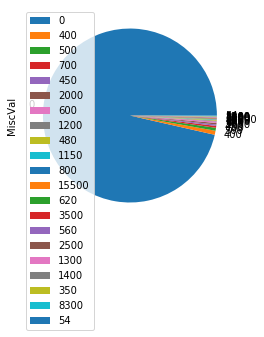

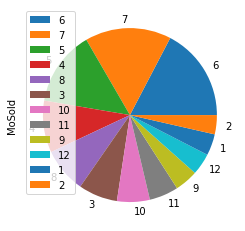

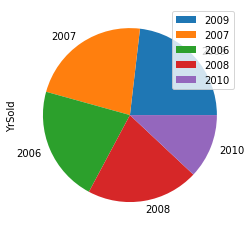

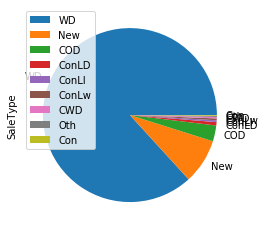

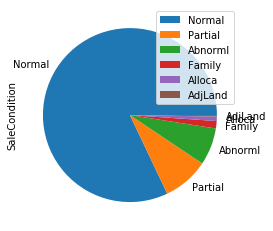

In [12]:
for col in discrete_variables:
    if col != 'Id':
        plt.figure()
        df_train[col].value_counts().plot.pie()
        plt.legend()

In [21]:
# 'Bedroom', 'Kitchen'
X_train = df_train[[
    'YearBuilt', 'YrSold', 'SaleType', 'SaleCondition','LotConfig', 'Alley', 'OverallCond', 'OverallQual',
    'LotArea', 'TotRmsAbvGrd', 'Fireplaces', 'GarageArea', 'Neighborhood',
    'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'Foundation', 'ExterQual'
]] # housestyle

In [14]:
continuous_variables = list()
discrete_variables = list ()

for col in X_train:
    if len(X_train[col].unique()) > 10 or col == 'YrSold':
        continuous_variables.append(col)
    else:
        discrete_variables.append(col)

print(continuous_variables)
print('---------------------')
print(discrete_variables)

['YearBuilt', 'YrSold', 'LotArea', 'TotRmsAbvGrd', 'GarageArea', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF']
---------------------
['SaleType', 'SaleCondition', 'LotConfig', 'Alley', 'OverallCond', 'OverallQual', 'Fireplaces', 'Foundation', 'ExterQual']


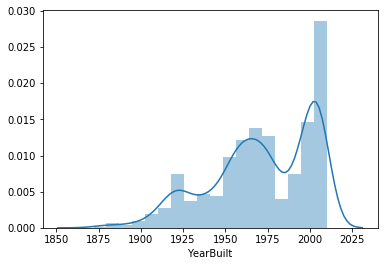

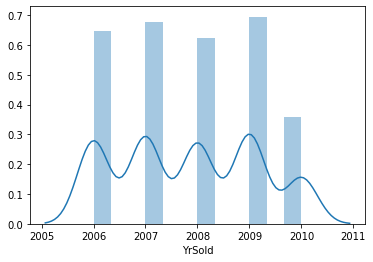

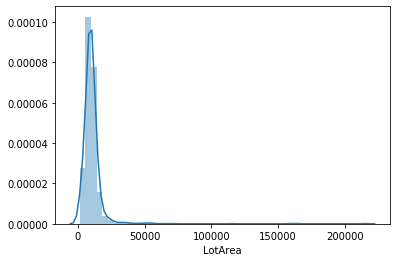

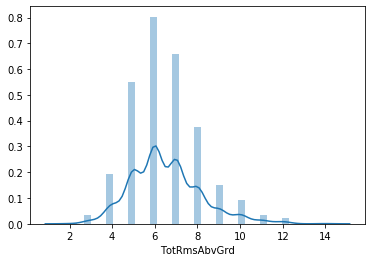

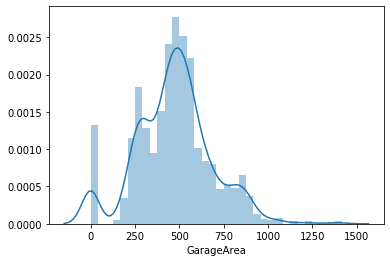

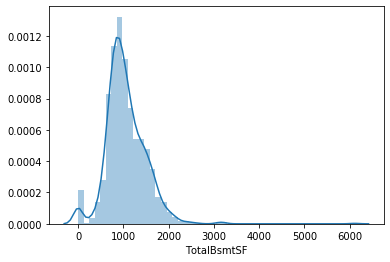

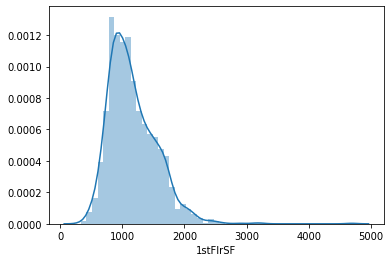

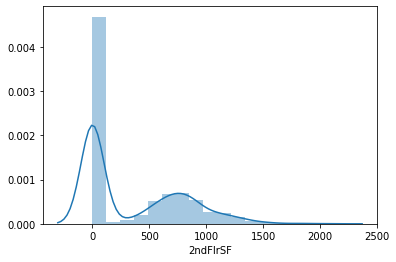

In [15]:
for col in continuous_variables:
    plt.figure()
    sns.distplot(X_train[col])

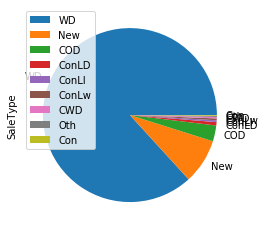

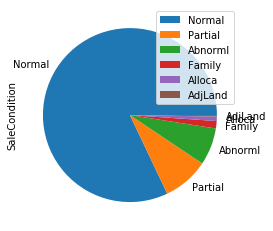

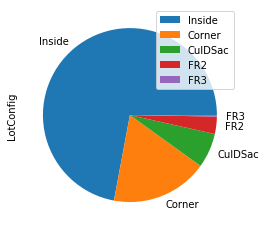

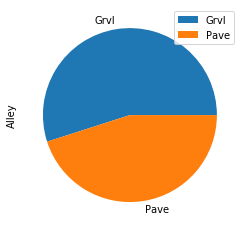

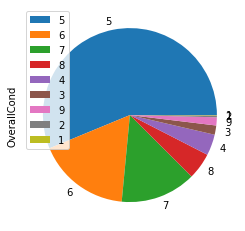

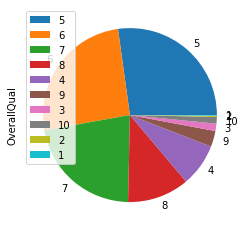

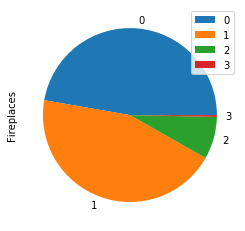

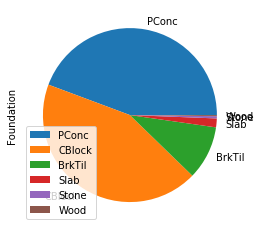

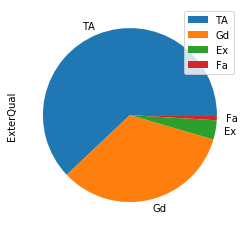

In [16]:
for col in discrete_variables:
    plt.figure()
    X_train[col].value_counts().plot.pie()
    plt.legend()

In [84]:
# 'Bedroom', 'Kitchen'
X_train = df_train[[
    'YearBuilt', 'YrSold', 'SaleType', 'SaleCondition','LotConfig', 'Alley', 'OverallCond', 'OverallQual', 'LotArea',
    'Fireplaces', 'GarageArea', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'Foundation', 'ExterQual', 'HouseStyle', 'Neighborhood',
    'PoolArea', 'TotRmsAbvGrd', 'BedroomAbvGr', 'BsmtFullBath', 'BsmtHalfBath', 'GrLivArea',
    'OpenPorchSF', 'EnclosedPorch', 'ScreenPorch', '3SsnPorch', 'LotFrontage'
]] 
Y_train = df_train[['SalePrice']]
X_test = df_train[[
    'YearBuilt', 'YrSold', 'SaleType', 'SaleCondition','LotConfig', 'Alley', 'OverallCond', 'OverallQual', 'LotArea',
    'Fireplaces', 'GarageArea', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'Foundation', 'ExterQual', 'HouseStyle', 'Neighborhood',
    'PoolArea', 'TotRmsAbvGrd', 'BedroomAbvGr', 'BsmtFullBath', 'BsmtHalfBath', 'GrLivArea',
    'OpenPorchSF', 'EnclosedPorch', 'ScreenPorch', '3SsnPorch', 'LotFrontage'
]] 

In [25]:
# Fireplaces is_fireplace : 0 ou 1
# YearBuild calc to get older
#

In [81]:
continuous_variables = list()
discrete_variables = list ()

for col in X_train:
    if len(X_train[col].unique()) > 10 or col == 'YrSold':
        continuous_variables.append(col)
    else:
        discrete_variables.append(col)

print(continuous_variables)
print('---------------------')
print(discrete_variables)

['YearBuilt', 'YrSold', 'LotArea', 'GarageArea', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'Neighborhood', 'TotRmsAbvGrd', 'GrLivArea', 'OpenPorchSF', 'EnclosedPorch', 'ScreenPorch', '3SsnPorch', 'LotFrontage']
---------------------
['SaleType', 'SaleCondition', 'LotConfig', 'Alley', 'OverallCond', 'OverallQual', 'Fireplaces', 'Foundation', 'ExterQual', 'HouseStyle', 'PoolArea', 'BedroomAbvGr', 'BsmtFullBath', 'BsmtHalfBath']


In [82]:
for col in continuous_variables:
    print(f'{col :-<50}{X_train[col].unique()}')

YearBuilt-----------------------------------------[2003 1976 2001 1915 2000 1993 2004 1973 1931 1939 1965 2005 1962 2006
 1960 1929 1970 1967 1958 1930 2002 1968 2007 1951 1957 1927 1920 1966
 1959 1994 1954 1953 1955 1983 1975 1997 1934 1963 1981 1964 1999 1972
 1921 1945 1982 1998 1956 1948 1910 1995 1991 2009 1950 1961 1977 1985
 1979 1885 1919 1990 1969 1935 1988 1971 1952 1936 1923 1924 1984 1926
 1940 1941 1987 1986 2008 1908 1892 1916 1932 1918 1912 1947 1925 1900
 1980 1989 1992 1949 1880 1928 1978 1922 1996 2010 1946 1913 1937 1942
 1938 1974 1893 1914 1906 1890 1898 1904 1882 1875 1911 1917 1872 1905]
YrSold--------------------------------------------[2008 2007 2006 2009 2010]
LotArea-------------------------------------------[ 8450  9600 11250 ... 17217 13175  9717]
GarageArea----------------------------------------[ 548  460  608  642  836  480  636  484  468  205  384  736  352  840
  576  516  294  853  280  534  572  270  890  772  319  240  250  271
  447  556  691  672

In [79]:
for col in discrete_variables:
    print(f'{col :-<50}{X_train[col].unique()}')

SaleType------------------------------------------['WD' 'New' 'COD' 'ConLD' 'ConLI' 'CWD' 'ConLw' 'Con' 'Oth']
SaleCondition-------------------------------------['Normal' 'Abnorml' 'Partial' 'AdjLand' 'Alloca' 'Family']
LotConfig-----------------------------------------['Inside' 'FR2' 'Corner' 'CulDSac' 'FR3']
Alley---------------------------------------------[nan 'Grvl' 'Pave']
OverallCond---------------------------------------[5 8 6 7 4 2 3 9 1]
OverallQual---------------------------------------[ 7  6  8  5  9  4 10  3  1  2]
Fireplaces----------------------------------------[0 1 2 3]
Foundation----------------------------------------['PConc' 'CBlock' 'BrkTil' 'Wood' 'Slab' 'Stone']
ExterQual-----------------------------------------['Gd' 'TA' 'Ex' 'Fa']
HouseStyle----------------------------------------['2Story' '1Story' '1.5Fin' '1.5Unf' 'SFoyer' 'SLvl' '2.5Unf' '2.5Fin']
PoolArea------------------------------------------[  0 512 648 576 555 480 519 738]
BedroomAbvGr----------------

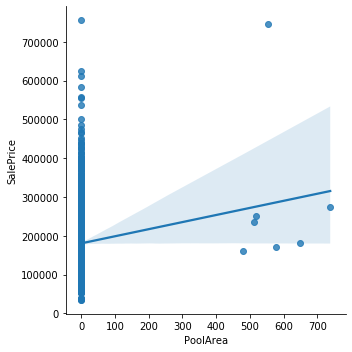

In [61]:
sns.lmplot(x="PoolArea", y="SalePrice", data=df_train)

In [63]:
(X_train['PoolArea'] > 0).value_counts()

False    1453
True        7
Name: PoolArea, dtype: int64